# Importation des données

In [1]:
import pickle

MAIN_PATH = './data/prepared_data/'
USEFULL_PATH = MAIN_PATH + 'useful/'

def load_pickle(path: str):
    """
    Load a pickle file.

    Parameters
    ----------
    path : str
        Path to the pickle file.

    Returns
    -------
    object
        The object stored in the pickle file.
    """
    with open(path, 'rb') as f:
        return pickle.load(f)

# Load data
X_useful_train = load_pickle(USEFULL_PATH + 'X_useful_train.pkl')
X_useful_test = load_pickle(USEFULL_PATH + 'X_useful_test.pkl')
Y_useful_train = load_pickle(USEFULL_PATH + 'Y_useful_train.pkl')
Y_useful_test = load_pickle(USEFULL_PATH + 'Y_useful_test.pkl')

# Entrainement des modèles

In [2]:
from sklearn.preprocessing import LabelEncoder

# Instantiate label encoder
label_encoder = LabelEncoder()

# Fit and transform y_train and y_test
Y_train_useful_encoded = label_encoder.fit_transform(Y_useful_train)
Y_test_useful_encoded = label_encoder.fit_transform(Y_useful_test)

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import numpy as np

# Instantiate decision tree classifier
tree_class = DecisionTreeClassifier(random_state=42)

# Fit the model
tree_class.fit(X_useful_train, Y_train_useful_encoded)

# Predict
useful_predictions = tree_class.predict(X_useful_train)
# Compute the error (MSE)
tree_mse = mean_squared_error(
    Y_train_useful_encoded,
    useful_predictions
)
# Compute the RMSE
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Scores: [0.10644926 0.19914833 0.17652613 0.11901389 0.19914833 0.18437553
 0.15967389 0.17652613 0.13055824 0.15075567]
Mean: 0.16021753850025963
Standard deviation: 0.03115289075838951


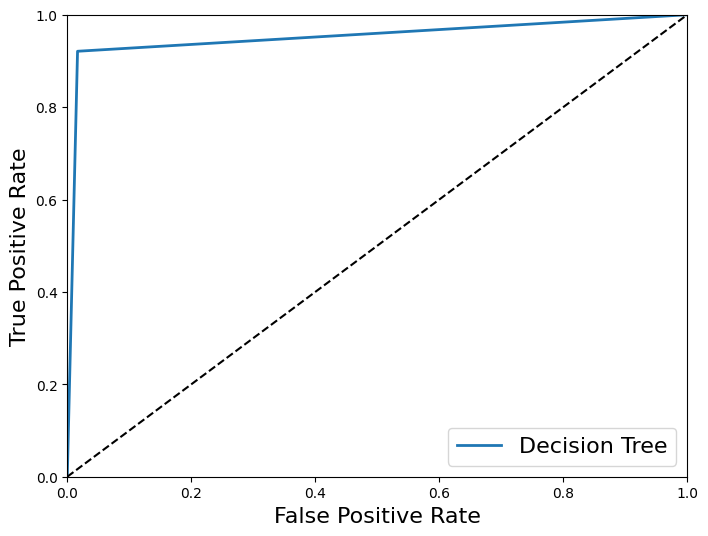

AUC score: 0.9521771177385605


In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def display_scores(scores: np.ndarray):
    """
    Display the scores of a cross validation.

    Parameters
    ----------
    scores : np.ndarray
        The scores of the cross validation.
    """
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

def plot_roc_curve(fpr: np.ndarray, tpr: np.ndarray, label: str=None):
    """
    Plot the ROC curve.

    Parameters
    ----------
    fpr : np.ndarray
        False positive rate.
    tpr : np.ndarray
        True positive rate.
    label : str, optional
        Label of the curve. The default is None.
    """
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

# Cross validation
scores = cross_val_score(
    tree_class,
    X_useful_train,
    Y_train_useful_encoded,
    scoring="neg_mean_squared_error",
    cv=10
)
# Compute the RMSE
tree_rmse_scores = np.sqrt(-scores)
# Compute the predictions
tree_predict = cross_val_predict(
    tree_class,
    X_useful_train,
    Y_train_useful_encoded,
    cv=10,
    method='predict_proba'
)

# Display the scores
display_scores(tree_rmse_scores)
tree_scores = tree_predict[:,1]
# Compute the ROC curve
fpr_forest, tpr_forest, thresholds_forest = roc_curve(
    Y_train_useful_encoded,
    tree_scores
)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Decision Tree")
plt.legend(loc="lower right", fontsize=16)
plt.show()

# Compute the AUC score
print(
    "AUC score:",
    roc_auc_score(Y_train_useful_encoded, tree_scores)
)

Accuracy: 0.8390022675736961


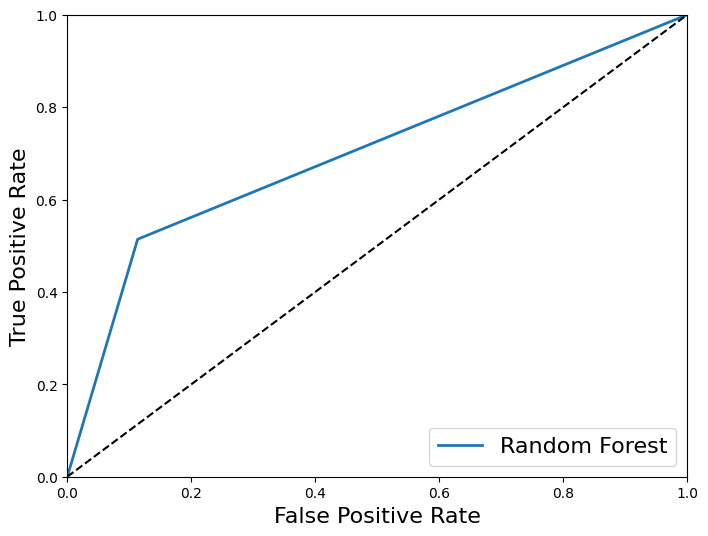

0.9521771177385605

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_useful_train, Y_useful_train)

# Compute the cross validation scores
y_pred = rf.predict(X_useful_test)
accuracy = accuracy_score(Y_useful_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display the cross validation prediction
Y_test_predict = cross_val_predict(
    tree_class,
    X_useful_test,
    Y_test_useful_encoded,
    cv=10,
    method='predict_proba'
)
Y_test_scores = Y_test_predict[:,1]

# Display the ROC curve
fpr_forest, tpr_forest, thresholds_forest = roc_curve(
    Y_test_useful_encoded,
    Y_test_scores
)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

# Display the ROC AUC score
roc_auc_score(Y_train_useful_encoded, tree_scores)